# **Actividad: Problemas de regresión**

**Andrés Alejandro Guzmán González - A01633819**






In [1]:
# Llamado a librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split

## **Ejercicio 1**

 El conjunto de **datos de criminalidad de Estados Unidos** publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

* **VR** = crímenes violentos por cada 100000 habitantes
* **MR** = asesinatos por cada 100000 habitantes
* **M** = porcentaje de áreas metropolitanas
* **W** = porcentaje de gente blanca
* **H** = porcentaje de personas con preparatoria terminada
* **P** = porcentaje con ingresos por debajo del nivel de pobreza
* **S** = porcentaje de familias con solo un miembro adulto como tutor

*Consideraciones:*
* Terminación de matrícula: 9
  *  Variable dependiente MR, variables independientes M, W, H, P y S.
  * El método de validación cruzada a utilizar en el punto 4: **LOOCV**

In [2]:
df = pd.read_csv('/content/sample_data/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [3]:
df.isnull().sum()

State    0
VR       0
MR       0
M        0
W        0
H        0
P        0
S        0
dtype: int64

In [4]:
df = df.drop(columns=['State', 'VR'])
df.head()

,MR,M,W,H,P,S
0,9.0,41.8,75.2,86.6,9.1,14.3
1,11.6,67.4,73.5,66.9,17.4,11.5
2,10.2,44.7,82.9,66.3,20.0,10.7
3,8.6,84.7,88.6,78.7,15.4,12.1
4,13.1,96.7,79.3,76.2,18.2,12.5


In [5]:
correl = df.corr()

In [6]:
alta_corr=np.where((correl > 0.95)&(correl < 1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

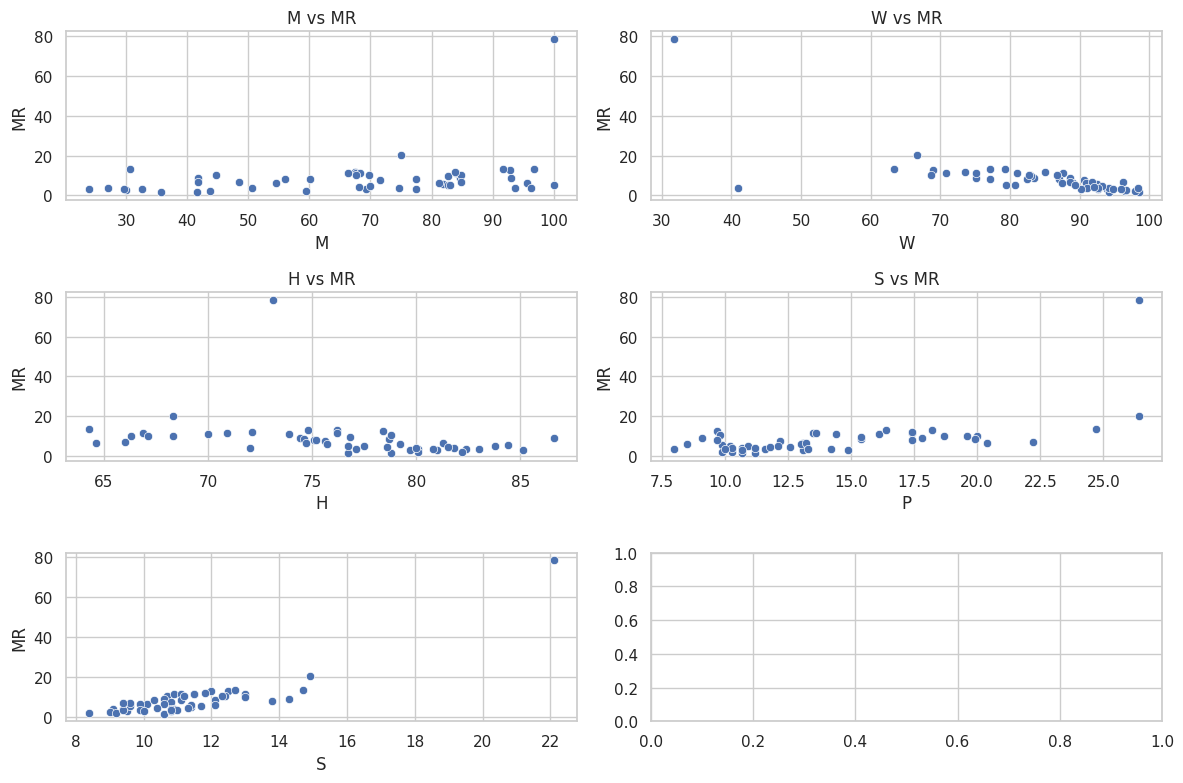

In [7]:
# Grafica cada variable predictora vs la variable de respuesta asignadas
# a tu número de matrícula.
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

sns.scatterplot(data=df, x='M', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M vs MR')

sns.scatterplot(data=df, x='W', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W vs MR')

sns.scatterplot(data=df, x='H', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('H vs MR')

sns.scatterplot(data=df, x='P', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('P vs MR')

sns.scatterplot(data=df, x='S', y='MR', ax=axes[2, 0])
axes[1, 1].set_title('S vs MR')

plt.tight_layout()
plt.show()

Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [8]:
# Variables regresoras
x = np.array(df[['M','W','H','P','S']])
y = np.array(df['MR'])

# Promedio de los valores
x_mean = x.mean()
y_mean = y.mean()

In [9]:
def model_fit(x,y):
  return np.linalg.inv(x.T @ x) @ x.T @ y

def prediction(x, b):
  return x @ b

In [10]:
x = np.column_stack((np.ones(x.shape[0]), x))

In [11]:
betas = model_fit(x,y)
betas

array([-33.73141336,   0.05104714,  -0.195887  ,   0.1995895 ,
         0.58140297,   2.82467971])

In [12]:
y_predict = prediction(x, betas)
y_predict

array([16.6397921 , 11.26423508,  7.39627738, 12.07661488, 16.76975615,
        9.1045627 ,  2.9985335 ,  8.53660241,  9.79944258, 14.57635013,
        8.41295779, -3.02054615, -0.78415304, 10.28931619,  4.86482275,
        3.05696635,  5.45765325, 28.10018798,  6.31119626, 12.69272897,
        0.68636906, 15.2148908 ,  2.54755361,  7.49466559, 24.15313644,
        4.69077614,  8.61972199, -4.51287051, -0.75371144, -1.74693984,
        4.30836316, 16.15163165, 10.06541115, 16.16486845,  8.14711888,
       10.98908261,  6.63119785,  2.9229871 ,  4.29616068, 15.64158746,
        0.45997764,  9.9294006 , 11.71949299,  3.10752753,  4.86479237,
        1.38391644,  9.80252992,  4.09378506,  2.17048088,  3.80425199,
       57.50854645])

In [13]:
# Calculamos el coeficiente de correlación
r = y - y_predict
r

array([-7.63979210e+00,  3.35764918e-01,  2.80372262e+00, -3.47661488e+00,
       -3.66975615e+00, -3.30456270e+00,  3.30146650e+00, -3.53660241e+00,
       -8.99442576e-01, -3.17635013e+00, -4.61295779e+00,  5.32054615e+00,
        3.68415304e+00,  1.11068381e+00,  2.63517725e+00,  3.34303365e+00,
        1.14234675e+00, -7.80018798e+00, -2.41119626e+00,  7.27102586e-03,
        9.13630937e-01, -5.41489080e+00,  8.52446386e-01,  3.80533441e+00,
       -1.06531364e+01, -1.69077614e+00,  2.68027801e+00,  6.21287051e+00,
        4.65371144e+00,  3.74693984e+00,  9.91636843e-01, -8.15163165e+00,
        3.34588849e-01, -2.86486845e+00, -2.14711888e+00, -2.58908261e+00,
       -2.03119785e+00,  3.87701290e+00, -3.96160682e-01, -5.34158746e+00,
        2.94002236e+00,  2.70599398e-01,  1.80507011e-01, -7.52752527e-03,
        3.43520763e+00,  2.21608356e+00, -4.60252992e+00,  3.06214936e-01,
        4.72951912e+00, -4.04251988e-01,  2.09914536e+01])

Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de $r^2$, $MSE$ y $MAE$.


In [14]:
folds = 5
kf = KFold(n_splits=folds, shuffle=True)
mse = []
mae = []
r2 = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, : ]
  y_train = y[train_index]
  regression = linear_model.LinearRegression()
  regression.fit(x_train, y_train)
  # Test phase
  x_test = x[test_index, : ]
  y_test = y[test_index]
  y_predict = regression.predict(x_test)
  # Calculate MSE, MAE & R^2
  mse_i = mean_squared_error(y_test, y_predict)
  mse.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_predict)
  mae.append(mae_i)
  r2_i = r2_score(y_test, y_predict)
  r2.append(r2_i)
print('MSE:', np.average(mse), ' MAE:', np.average(mae),' R^2:', np.average(r2))

MSE: 65.57121836754496  MAE: 3.959793835761245  R^2: -1.4913181846777346


Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.


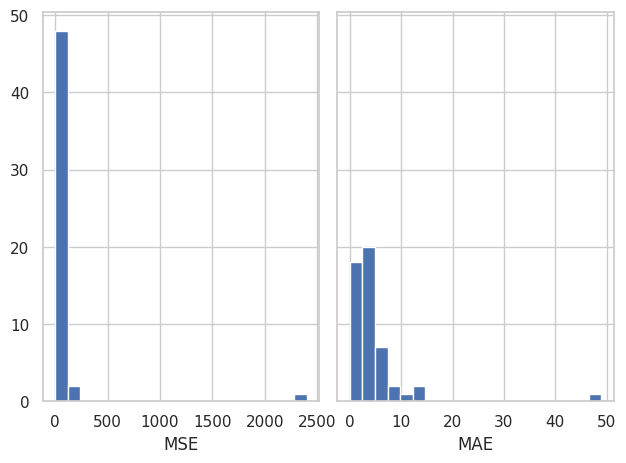

In [15]:
kf = LeaveOneOut()
mse_cv = []
mae_cv = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]

  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]

  y_pred = regr_cv.predict(x_test)

  # Calculate MSE and MAE
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)

  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

plt.show()

Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [16]:
df2 = pd.DataFrame()
df2['MR'] = df['MR']
df2['M2'] = df['M']**2
df2['W2'] = df['W']**2
df2['H2'] = df['H']**2
df2['P2'] = df['P']**2
df2['S2'] = df['S']**2

df2['MW'] = df['M'] * df['W']
df2['MH'] = df['M'] * df['H']
df2['MP'] = df['M'] * df['P']
df2['MS'] = df['M'] * df['S']

df2['WH'] = df['W'] * df['H']
df2['WP'] = df['W'] * df['P']
df2['WS'] = df['W'] * df['S']

df2['HP'] = df['H'] * df['P']
df2['HS'] = df['H'] * df['S']

df2['PS'] = df['P'] * df['S']
df2.head()

,MR,M2,W2,H2,P2,S2,MW,MH,MP,MS,WH,WP,WS,HP,HS,PS
0,9.0,1747.24,5655.04,7499.56,82.81,204.49,3143.36,3619.88,380.38,597.74,6512.32,684.32,1075.36,788.06,1238.38,130.13
1,11.6,4542.76,5402.25,4475.61,302.76,132.25,4953.90,4509.06,1172.76,775.10,4917.15,1278.90,845.25,1164.06,769.35,200.10
2,10.2,1998.09,6872.41,4395.69,400.00,114.49,3705.63,2963.61,894.00,478.29,5496.27,1658.00,887.03,1326.00,709.41,214.00
3,8.6,7174.09,7849.96,6193.69,237.16,146.41,7504.42,6665.89,1304.38,1024.87,6972.82,1364.44,1072.06,1211.98,952.27,186.34
4,13.1,9350.89,6288.49,5806.44,331.24,156.25,7668.31,7368.54,1759.94,1208.75,6042.66,1443.26,991.25,1386.84,952.50,227.50


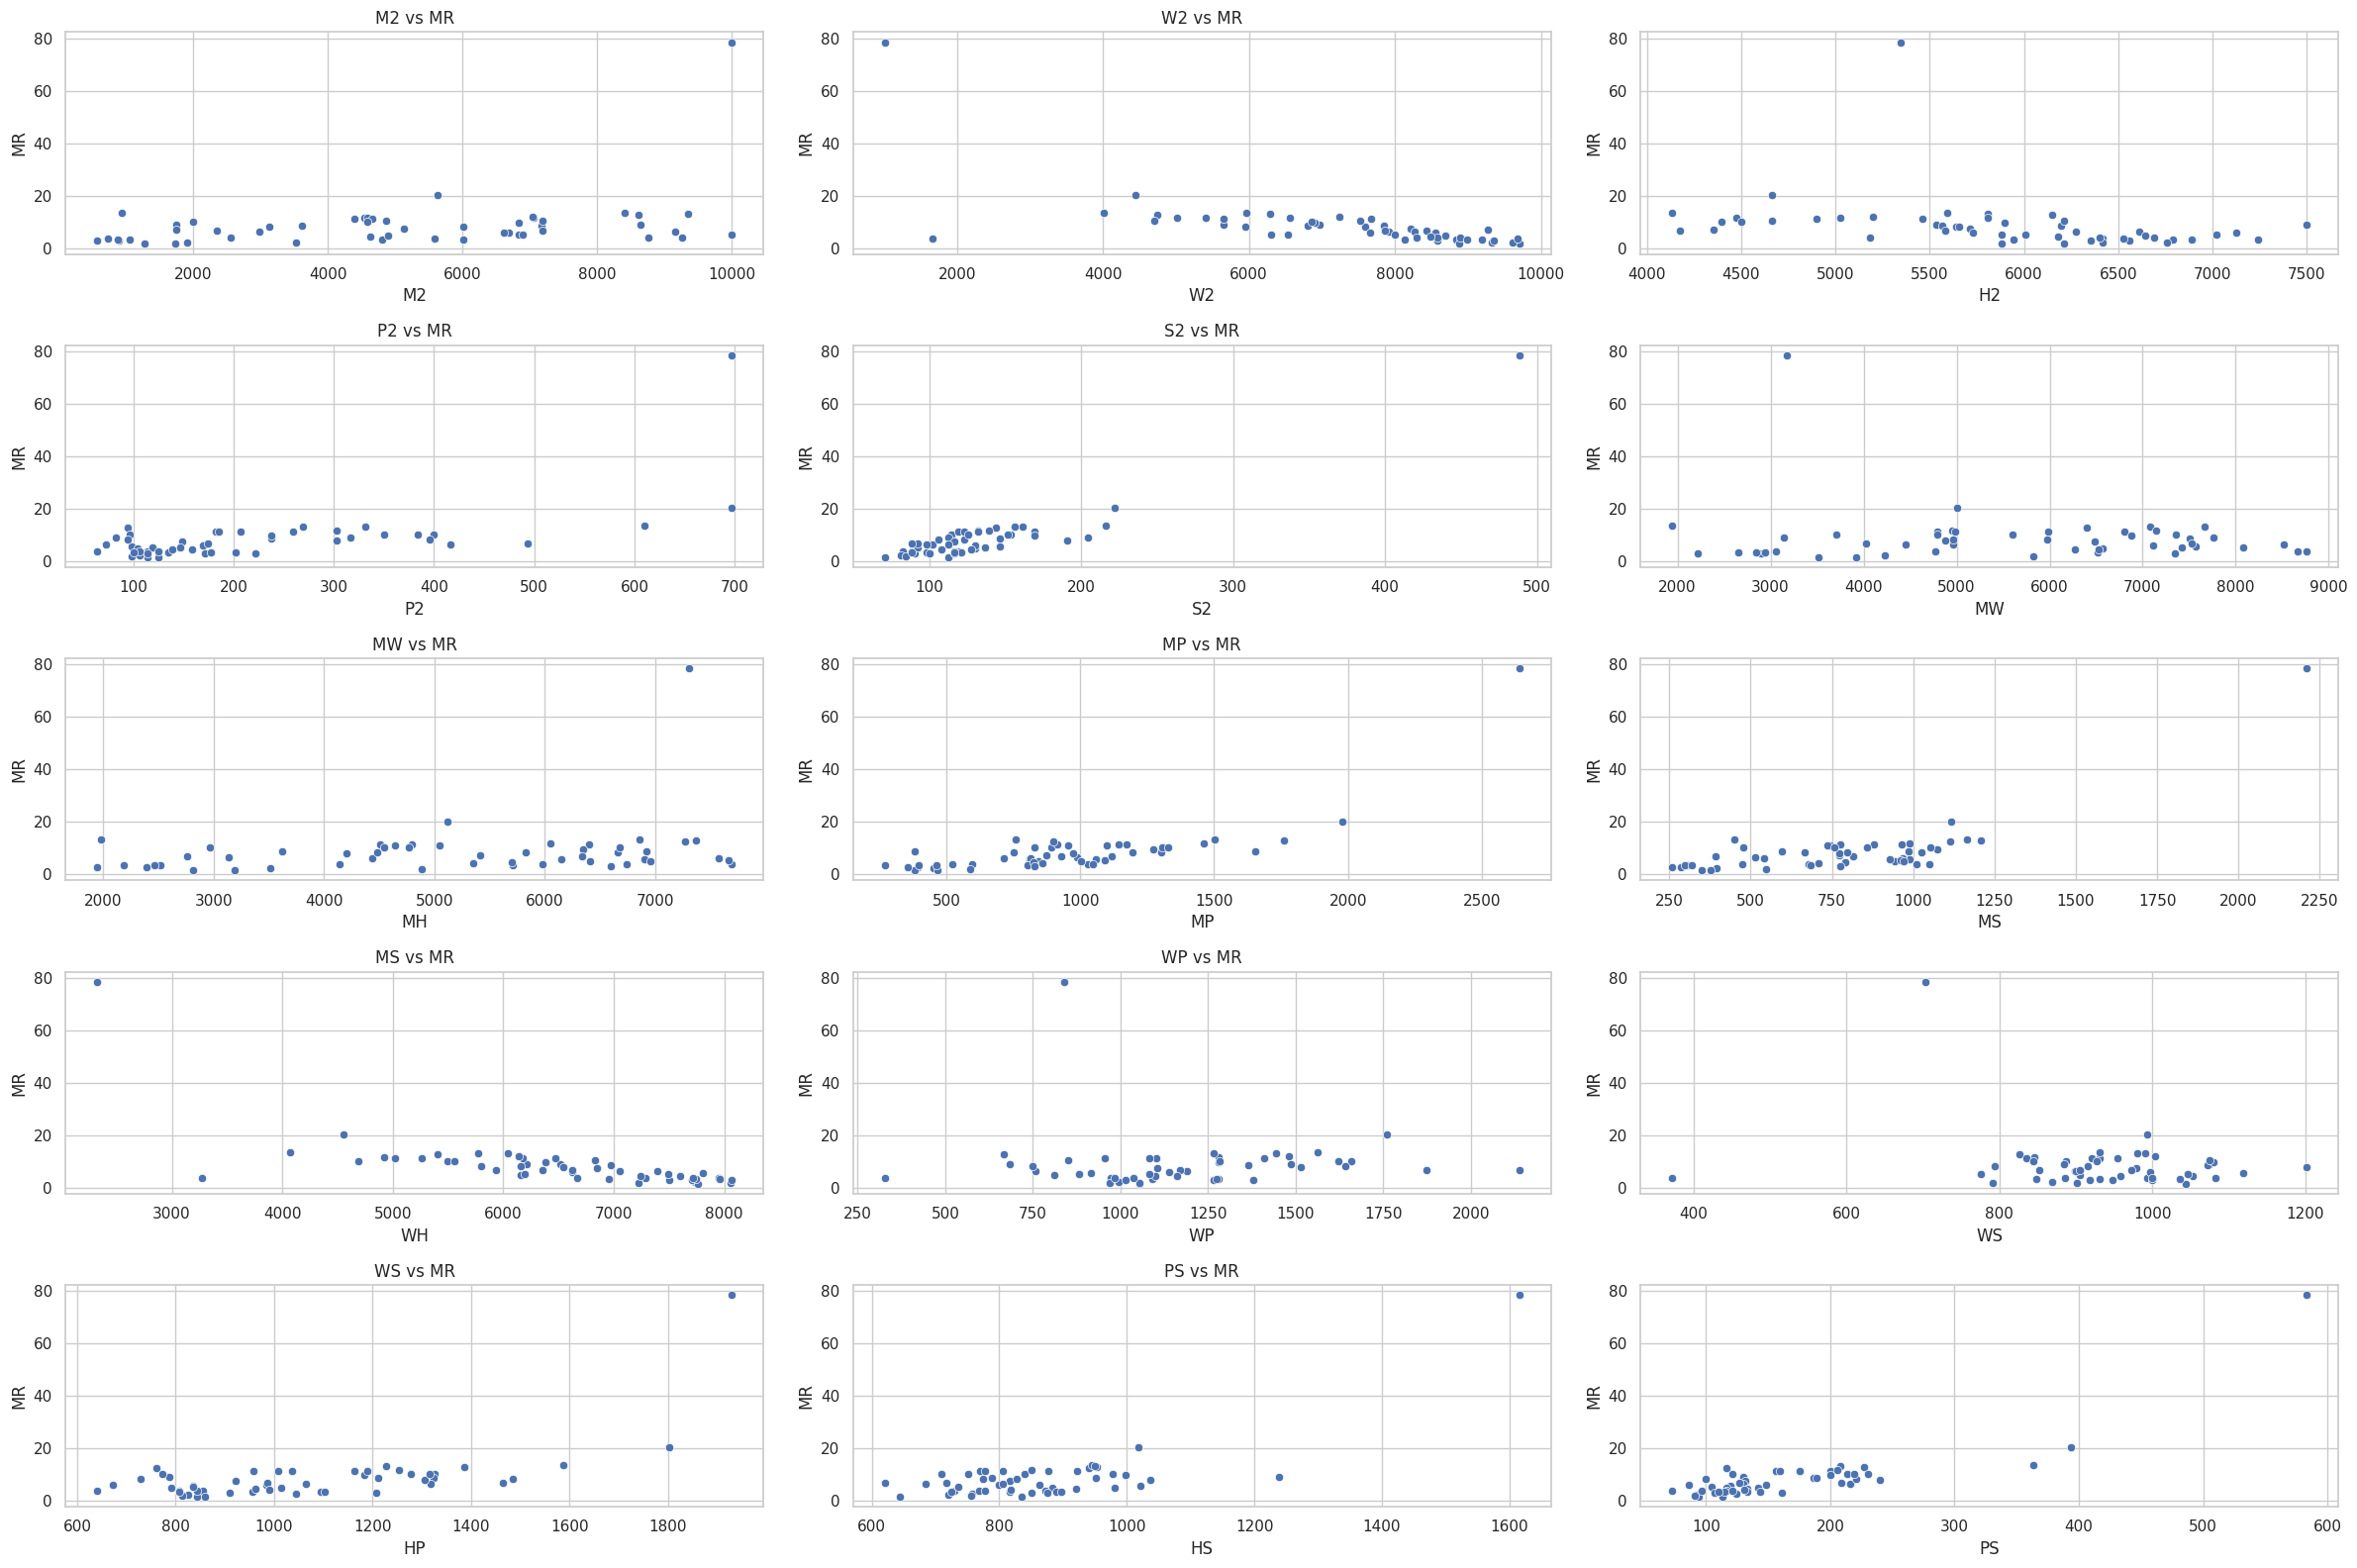

In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(24, 16))
plt.subplots_adjust(hspace=0.5)



sns.scatterplot(data=df2, x='M2', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M2 vs MR')

sns.scatterplot(data=df2, x='W2', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W2 vs MR')

sns.scatterplot(data=df2, x='H2', y='MR', ax=axes[0, 2])
axes[1, 0].set_title('H2 vs MR')

sns.scatterplot(data=df2, x='P2', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('P2 vs MR')

sns.scatterplot(data=df2, x='S2', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('S2 vs MR')



sns.scatterplot(data=df2, x='MW', y='MR', ax=axes[1, 2])
axes[2, 0].set_title('MW vs MR')

sns.scatterplot(data=df2, x='MH', y='MR', ax=axes[2, 0])
axes[2, 1].set_title('MH vs MR')

sns.scatterplot(data=df2, x='MP', y='MR', ax=axes[2, 1])
axes[2, 1].set_title('MP vs MR')

sns.scatterplot(data=df2, x='MS', y='MR', ax=axes[2, 2])
axes[3, 0].set_title('MS vs MR')



sns.scatterplot(data=df2, x='WH', y='MR', ax=axes[3, 0])
axes[3, 1].set_title('WH vs MR')

sns.scatterplot(data=df2, x='WP', y='MR', ax=axes[3, 1])
axes[3, 1].set_title('WP vs MR')

sns.scatterplot(data=df2, x='WS', y='MR', ax=axes[3, 2])
axes[4, 0].set_title('WS vs MR')



sns.scatterplot(data=df2, x='HP', y='MR', ax=axes[4, 0])
axes[4, 1].set_title('HP vs MR')

sns.scatterplot(data=df2, x='HS', y='MR', ax=axes[4, 1])
axes[4, 1].set_title('HS vs MR')



sns.scatterplot(data=df2, x='PS', y='MR', ax=axes[4, 2])
axes[4, 1].set_title('PS vs MR')

plt.tight_layout()
plt.show()

In [18]:
#Variables regresoras
x_2 = np.array(df2[['M2','W2','H2','P2','S2','MW','MH','MP','MS','WH','WP','WS','HP','HS','PS']])
y_2 = np.array(df2['MR'])

#Promedio de las variables
x2_mean = x_2.mean()
y2_mean = y_2.mean()

In [19]:
x_2 = np.column_stack((np.ones(x_2.shape[0]), x_2))

In [20]:
betas_2 = model_fit(x_2,y_2)
y_predict2 = prediction(x_2, betas_2)
r_2 = y_2 - y_predict2

In [21]:
kf_2 = KFold(n_splits=folds, shuffle=True)
mse_2 = []
mae_2 = []
r2_2 = []
for train_index, test_index in kf_2.split(x_2):
  # Training phase
  x_train = x_2[train_index, : ]
  y_train = y_2[train_index]
  regression = linear_model.LinearRegression()
  regression.fit(x_train, y_train)
  # Test phase
  x_test = x_2[test_index, : ]
  y_test = y_2[test_index]
  y_predict2 = regression.predict(x_test)
  # Calculate MSE, MAE & R^2
  mse_i = mean_squared_error(y_test, y_predict2)
  mse_2.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_predict2)
  mae_2.append(mae_i)
  r2_i = r2_score(y_test, y_predict2)
  r2_2.append(r2_i)
print('MSE:', np.average(mse_2), ' MAE:', np.average(mae_2),' R^2:', np.average(r2_2))

MSE: 21.876113316382938  MAE: 2.609859236284243  R^2: 0.2716651166324015


Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [22]:
# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()
# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 100000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

In [23]:
lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
for l in lambdas:
  betaR = fit_modelRidge(x_normalized,y,l)
  coefs.append(betaR)

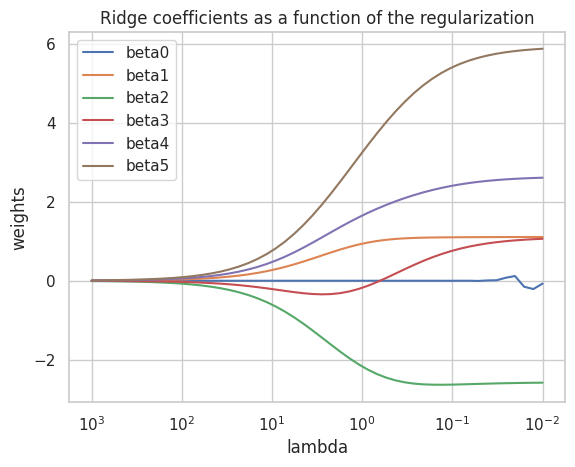

In [24]:
axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.show()

Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

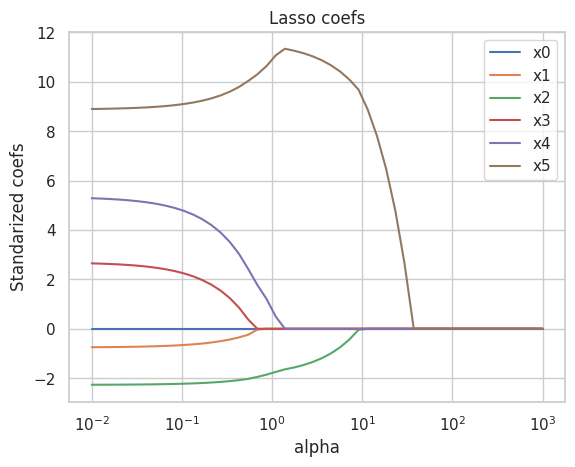

In [25]:
X_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.show()

- ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?
El modelo de regresion lineal no es efectivo para modelar los datos del problema ya que al momento de sacar R2 nos da un valor negativo y por encima de 1. Esto quiere decir que en el modelo lineal no obtendremos un resultado ajustado segun las caracteristicas de nuestros datos y que deberiams considerar otro tipo de modelo.
- ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.
En validacion cruzada, los valores de R2 toman mayor sentido ya que, a pesar de mostrar un resultado de ajuste del 0.27 (reflejando un ajuste del modelo pobre), dicho resultado cobra mayor sentido que en comapracion a usar un modelo de regresion lineal donde R2 tiene un resultado fuera de lugar en base a nuestros datos. En cuanto a MSE y MAE la variabilidad es minima en comparacion con el modelo lineal y de validacion cruzada, siendo el ultimo quien toma valores un poco por encima que el del lineal pero aun asi, dando resultados muy parecidos entre si.
- ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?
En este caso es mejor el mejor modelo cuadratico ya que aqui no consideramos realmente R2 y ademas, considerando las preguntas anteriores, R2 no tuvo sentido en el modelo lineal por lo que el mejor modelo a utilizar es el cuadratico. Aunque el modelo cuadratico tuvo un ajuste muy pobre, es visiblemente mejor al lineal por ese simple aspecto, ya que tambien mencionamos que la variabilidad entre MSE y MAE en ambos modelos es minima.
- ¿Qué variables son más relevantes para el modelo según Ride y Lasso?
En Ride tenemos como variables relevantes a: M, H, P y S; mientras que en Lasso tenemos como variabes relevantes a: H, P y S. Tambien a considerar que MR es una variable que se mantiene constante en valores de 0 por lo que no es relevante; al igual que M y W que en los diferentes modelos tienen valores por debajo de 0.
- ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores? Una relacion es que tanto las variables H, P y S son variables relevantes en ambos modelos y MR se mantiene como una variable constante con valor a 0, ademas, en ambos modelos se suelen o empezar o terminar todas las variables desde un mismo punto dependiendo el tipo de modelo.

##**Ejercicio 2**

El conjunto de datos de esperanzas de vida *(Life Expectancy (WHO) | Kaggle)* tiene el registro de la esperanza de vida de 193 países medida en diferentes años, junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad. Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna **("Life expectancy")**. A su vez, las variables independientes de interés son:

* X1 - Adult mortality
* X2 - Infant deaths
* X3 - Alcohol
* X4 - Percentage expenditure
* X5 - Hepatitis B
* X6 - Measles
* X7 - BMI
* X8 - Under-five deaths
* X9 - Polio
* X10 - Total expenditure
* X11 - Diphtheria
* X12 - HIV/AIDS   
* X13 - GDP
* X14 - Population
* X15 - Thinness  1-19 years
* X16 - Thinness 5-9 years
* X17 - Income composition of resources
* X18 - Schooling

*Consideraciones:*
* Penúltimo número de matrícula: 1
  * Todas las variables, menos X1, X5, X9, X13, X17


In [26]:
df2 = pd.read_csv('/content/sample_data/life_expectancy_data.csv')
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
df2.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [28]:
df2 = df2.dropna()
df_status = df2

In [29]:
df2 = df2.drop(columns=['Country','Year','Status','Adult Mortality','Hepatitis B','Polio','GDP','Income composition of resources'], axis=1)
df2.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,65.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,59.9,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,59.9,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,59.5,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,59.2,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [30]:
# Variables regresoras
x_life = np.array(df2[['infant deaths','Alcohol','percentage expenditure','Measles ',' BMI ','under-five deaths ','Total expenditure','Diphtheria ',' HIV/AIDS','Population',' thinness  1-19 years', ' thinness 5-9 years', 'Schooling']])
y_life = np.array(df2['Life expectancy '])

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, r_regression,f_regression
# Creamomos el modelo de regresión lineal
model = LinearRegression()

# Realizamos validación cruzada y obtener el score R2
scores = cross_val_score(model, x_life, y_life, cv=10, scoring='r2')

# Imprimir los scores de la validación cruzada
print("Scores X-Validation:", scores)
print("\nScore Average:", scores.mean())

Scores X-Validation: [0.63850221 0.83347992 0.72799955 0.77049716 0.63338871 0.80962943
 0.58534305 0.73552998 0.58040315 0.81338127]

Score Average: 0.7128154437625017


In [32]:
# Evaluamos con validación cruzada
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

folds_life = 10
kf_life = KFold(n_splits=folds_life, shuffle=True)
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf_life.split(x_life):
    # Training phase
    x_train = x_life[train_index, :]
    y_train = y_life[train_index]

    fselectionCV = SelectKBest(r_regression,k=folds_life)  # Choose the appropriate value of k
    fselectionCV.fit(x_train, y_train)
    X_train = fselectionCV.transform(x_train)

    regrCV = linear_model.LinearRegression()
    regrCV.fit(X_train, y_train)

    # Test phase
    x_test = fselectionCV.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regrCV.predict(x_test)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), 'MAE:', np.average(mae_cv), 'R^2:', np.average(r2_cv))


MSE: 30.197963532652455 MAE: 4.140698776687403 R^2: 0.6081965638088977


1. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

----- Num. de Característica:  1
MSE: 36.54451792639633  MAE: 4.562372688328573  R^2: 0.5215066392714365
----- Num. de Característica:  2
MSE: 34.376393166450654  MAE: 4.468333449055066  R^2: 0.5522925292239403
----- Num. de Característica:  3
MSE: 33.5450246125486  MAE: 4.404732112771983  R^2: 0.5648830847584749
----- Num. de Característica:  4
MSE: 32.8610262874218  MAE: 4.3681035836772875  R^2: 0.5713552289423719
----- Num. de Característica:  5
MSE: 32.07630334340262  MAE: 4.30800444889095  R^2: 0.5835056001938328
----- Num. de Característica:  6
MSE: 32.242542985857675  MAE: 4.321568636837964  R^2: 0.5801316567833451
----- Num. de Característica:  7
MSE: 32.11435789555017  MAE: 4.314164711027673  R^2: 0.5825142620835096
----- Num. de Característica:  8
MSE: 32.10623016356467  MAE: 4.303530549938605  R^2: 0.5797913836972162
----- Num. de Característica:  9
MSE: 32.12518080932987  MAE: 4.310588987402607  R^2: 0.582063409973031

Número óptimo de caracteríatcas:  5
Caracteríasticas:  

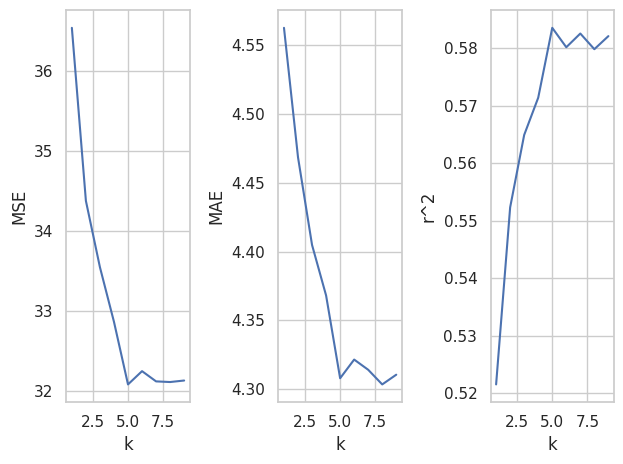

In [33]:
# Encontrar el número óptimo de características mediante validación cruzada
nFeats = [1,2,3,4,5,6,7,8,9]
mseNfeat = []
maeNfeat = []
r_2Nfeat = []
selected_features = []

for nFeat in nFeats:
  print('----- Num. de Característica: ', nFeat)
  mseCV = []
  maeCV = []
  r2CV = []
  kf = KFold(n_splits=10, shuffle=True)
  for train_index, test_index in kf.split(x_life):
    # Entrenamiento
    X_train = x_life[train_index, :]
    y_train = y_life[train_index]
    fselectionCV = SelectKBest(r_regression, k=nFeat)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)

    regrCV = linear_model.LinearRegression()
    regrCV.fit(X_train, y_train)
    selected_features.append(fselectionCV.get_feature_names_out())


    # Prueba
    x_test = fselectionCV.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regrCV.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)

  mse = np.average(mseCV)
  mseNfeat.append(mse)
  mae = np.average(maeCV)
  maeNfeat.append(mae)
  r2 = np.average(r2CV)
  r_2Nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

opt_feat = nFeats[np.argmin(mseNfeat)]
opt_sel_ind = selected_features[opt_feat - 1]
print("\nNúmero óptimo de caracteríatcas: ", opt_feat)
print("Caracteríasticas: ", opt_sel_ind, '\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(nFeats, mseNfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")
axs[1].plot(nFeats, maeNfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")
axs[2].plot(nFeats, r_2Nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")
plt.show()

3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

----- Num. de Característica:  1
MSE: 36.430565462772435  MAE: 4.554040532974198  R^2: 0.5286741828684388
----- Num. de Característica:  2
MSE: 20.968609419822275  MAE: 3.616115535744181  R^2: 0.7270997634647707
----- Num. de Característica:  3
MSE: 19.897794653259147  MAE: 3.5210742891448974  R^2: 0.7393725454824153
----- Num. de Característica:  4
MSE: 19.090612500490735  MAE: 3.4355898976777355  R^2: 0.7496809144478214
----- Num. de Característica:  5
MSE: 18.67915625073901  MAE: 3.408701078797113  R^2: 0.7556830126281291
----- Num. de Característica:  6
MSE: 18.62770394647907  MAE: 3.400667780564011  R^2: 0.7576945591259919
----- Num. de Característica:  7
MSE: 18.73914553754846  MAE: 3.4163753271611332  R^2: 0.7545397839671945
----- Num. de Característica:  8
MSE: 17.677143172312277  MAE: 3.3206010800600416  R^2: 0.7687087332613132
----- Num. de Característica:  9
MSE: 17.765899036639524  MAE: 3.329975921373202  R^2: 0.765797074114607

Número óptimo de características: 8
Caracterí

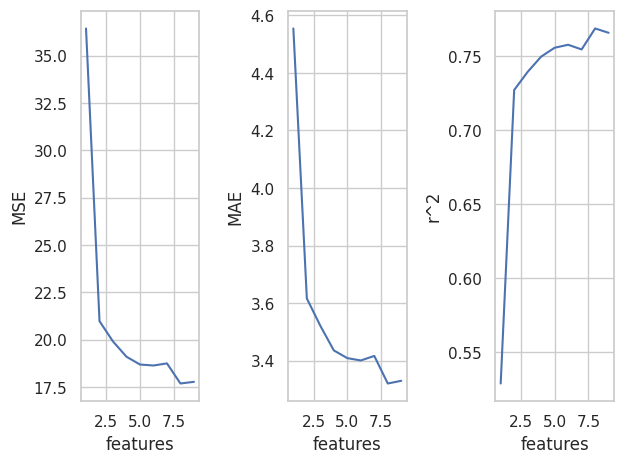

In [34]:
from sklearn.feature_selection import SelectKBest, r_regression, SequentialFeatureSelector, RFE
from sklearn.ensemble import RandomForestRegressor

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
    print('----- Num. de Característica: ', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x_life):
        # Training phase
        x_train = x_life[train_index, :]
        y_train = y_life[train_index]

        # Initialize the linear regression model
        regr_cv = linear_model.LinearRegression()

        # Initialize SequentialFeatureSelector
        fselection_cv = SequentialFeatureSelector(regr_cv,
                                                  n_features_to_select=n_feat,
                                                  direction='forward')
        fselection_cv.fit(x_train, y_train)

        # Get selected feature indices
        selected_indices = fselection_cv.get_support(indices=True)
        selected_features.append(selected_indices)

        # Transform the training data
        x_train_selected = fselection_cv.transform(x_train)

        # Fit the model
        regr_cv.fit(x_train_selected, y_train)

        # Test phase
        x_test = x_life[test_index, :]
        y_test = y_life[test_index]

        # Transform the test data
        x_test_selected = fselection_cv.transform(x_test)

        y_pred = regr_cv.predict(x_test_selected)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_indices = selected_features[optimal_n_feat - 1]
print("\nNúmero óptimo de características:", optimal_n_feat)
print("Características seleccionadas:", optimal_selected_indices,'\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

---- n features = 1
MSE: 36.5191719061063  MAE: 4.5610025997731665  R^2: 0.5207119333363225
---- n features = 2
MSE: 21.003532937044035  MAE: 3.617187743476349  R^2: 0.7264829415292431
---- n features = 3
MSE: 20.35852403847533  MAE: 3.5758612908499514  R^2: 0.7345220118408612
---- n features = 4
MSE: 20.388716168477686  MAE: 3.577288734742422  R^2: 0.7345641133049856
---- n features = 5
MSE: 20.452938461640066  MAE: 3.576837426706463  R^2: 0.7315701166504194
---- n features = 6
MSE: 18.8227143804498  MAE: 3.4483526986601603  R^2: 0.7499676356003394
---- n features = 7
MSE: 18.487734982949803  MAE: 3.419105524881803  R^2: 0.7568438271586307
---- n features = 8
MSE: 18.27896247454629  MAE: 3.399190027808713  R^2: 0.7630667522544259
---- n features = 9
MSE: 18.23315352484817  MAE: 3.3923226946760607  R^2: 0.7612511788414859

Número óptimo de características (MSE): 9
Número óptimo de características (MAE): 9
Número óptimo de características (R^2): 8 



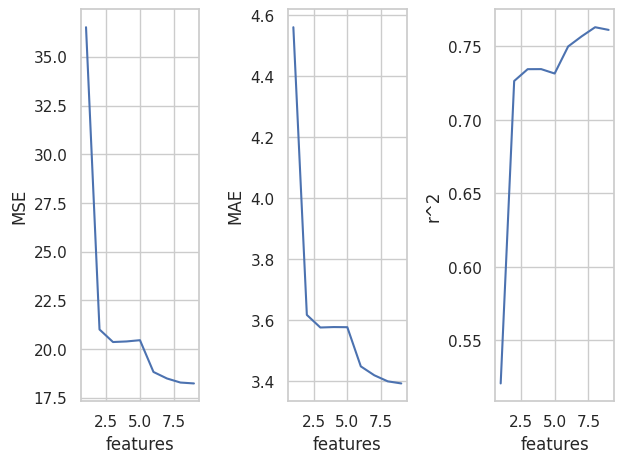

In [35]:
# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []
  kf = KFold(n_splits=10, shuffle = True)
  for train_index, test_index in kf.split(x_life):
    # Training phase
    x_train = x_life[train_index, :]
    y_train = y_life[train_index]
    regr_cv = LinearRegression()
    fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = fselection_cv.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)
  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

# Imprime los resultados
print("\nNúmero óptimo de características (MSE):", n_feats[np.argmin(mse_nfeat)])
print("Número óptimo de características (MAE):", n_feats[np.argmin(mae_nfeat)])
print("Número óptimo de características (R^2):", n_feats[np.argmax(r2_nfeat)],'\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.


In [36]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

# Realizamos validación cruzada y obtener el score R2
scores = cross_val_score(model, x_life, y_life, cv=10, scoring='r2')

# Imprimir los scores de la validación cruzada
print("Scores X-Validation:", scores)
print("\nScore Average:", scores.mean())

Scores X-Validation: [-0.34837127 -0.35864655 -0.65610874 -0.20938524 -0.32160116 -0.05103129
 -0.16748946 -1.21785562 -0.2515547   0.01048042]

Score Average: -0.35715636104571163


In [37]:
kf_life = KFold(n_splits=folds_life, shuffle=True)
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf_life.split(x_life):
    # Training phase
    x_train = x_life[train_index, :]
    y_train = y_life[train_index]

    fselectionCV = SelectKBest(r_regression,k=folds_life)  # Choose the appropriate value of k
    fselectionCV.fit(x_train, y_train)
    X_train = fselectionCV.transform(x_train)

    regrCV = KNeighborsRegressor()
    regrCV.fit(X_train, y_train)

    # Test phase
    x_test = fselectionCV.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regrCV.predict(x_test)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), 'MAE:', np.average(mae_cv), 'R^2:', np.average(r2_cv))

MSE: 79.21145174870658 MAE: 6.899344715447155 R^2: -0.0333883543847728


----- Num. de Característica:  1
MSE: 39.517368452328164  MAE: 4.6816535107169255  R^2: 0.4834798553375518
----- Num. de Característica:  2
MSE: 25.094517819660012  MAE: 3.74309453067258  R^2: 0.6707277066097309
----- Num. de Característica:  3
MSE: 31.376414585365854  MAE: 4.069816038433112  R^2: 0.5880247774489058
----- Num. de Característica:  4
MSE: 35.10187912638581  MAE: 4.339047819660014  R^2: 0.5422899741557491
----- Num. de Característica:  5
MSE: 32.27492109977827  MAE: 4.153330081300814  R^2: 0.5779291758821887
----- Num. de Característica:  6
MSE: 31.979471895048043  MAE: 4.139463488543977  R^2: 0.5849694123857452
----- Num. de Característica:  7
MSE: 79.4314977339246  MAE: 6.903569179600886  R^2: -0.034940541535298256
----- Num. de Característica:  8
MSE: 80.092142699187  MAE: 6.921971470805618  R^2: -0.04612645827615893
----- Num. de Característica:  9
MSE: 79.65076969549149  MAE: 6.910531929046563  R^2: -0.03573749274063402

Número óptimo de caracteríatcas:  2
Caractería

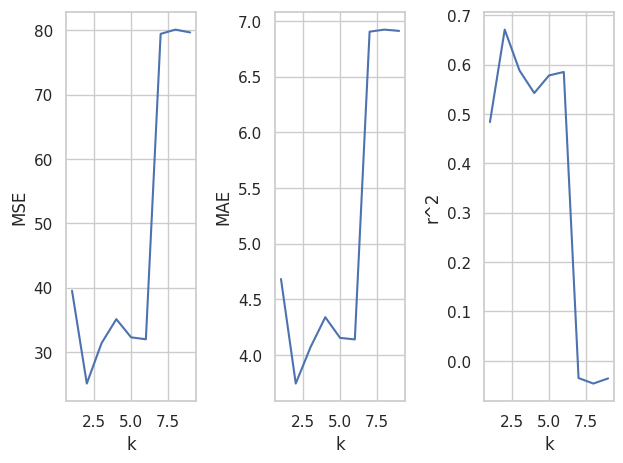

In [38]:
nFeats = [1,2,3,4,5,6,7,8,9]
mseNfeat = []
maeNfeat = []
r_2Nfeat = []
selected_features = []

for nFeat in nFeats:
  print('----- Num. de Característica: ', nFeat)
  mseCV = []
  maeCV = []
  r2CV = []
  kf = KFold(n_splits=10, shuffle=True)
  for train_index, test_index in kf.split(x_life):
    # Entrenamiento
    X_train = x_life[train_index, :]
    y_train = y_life[train_index]
    fselectionCV = SelectKBest(r_regression, k=nFeat)
    fselectionCV.fit(X_train, y_train)
    X_train = fselectionCV.transform(X_train)

    regrCV = KNeighborsRegressor()
    regrCV.fit(X_train, y_train)
    selected_features.append(fselectionCV.get_feature_names_out())


    # Prueba
    x_test = fselectionCV.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regrCV.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mseCV.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    maeCV.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2CV.append(r2_i)

  mse = np.average(mseCV)
  mseNfeat.append(mse)
  mae = np.average(maeCV)
  maeNfeat.append(mae)
  r2 = np.average(r2CV)
  r_2Nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

opt_feat = nFeats[np.argmin(mseNfeat)]
opt_sel_ind = selected_features[opt_feat - 1]
print("\nNúmero óptimo de caracteríatcas: ", opt_feat)
print("Caracteríasticas: ", opt_sel_ind, '\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(nFeats, mseNfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")
axs[1].plot(nFeats, maeNfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")
axs[2].plot(nFeats, r_2Nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")
plt.show()

----- Num. de Característica:  1
MSE: 44.0802340473023  MAE: 5.054528085735402  R^2: 0.4259718740405292
----- Num. de Característica:  2
MSE: 18.384166056171466  MAE: 3.3256197339246123  R^2: 0.7563574781822384
----- Num. de Característica:  3
MSE: 11.155943488543974  MAE: 2.439387287509239  R^2: 0.8538916417108162
----- Num. de Característica:  4
MSE: 8.38895993348115  MAE: 2.0999804138950475  R^2: 0.8908023853194015
----- Num. de Característica:  5
MSE: 8.079096379896525  MAE: 2.018064375461937  R^2: 0.8923798359490066
----- Num. de Característica:  6
MSE: 7.708214410938654  MAE: 1.9361042867701403  R^2: 0.8984336390178917
----- Num. de Característica:  7
MSE: 7.241505053954175  MAE: 1.8351900221729491  R^2: 0.9056443524592452
----- Num. de Característica:  8
MSE: 8.822908338507023  MAE: 2.0695161123429413  R^2: 0.8853714995426211
----- Num. de Característica:  9
MSE: 10.752362545454545  MAE: 2.204680266075388  R^2: 0.8586006508470888

Número óptimo de características: 7
Característi

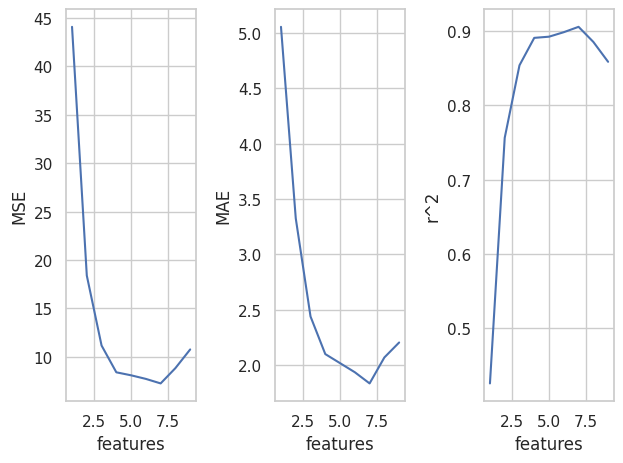

In [39]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
    print('----- Num. de Característica: ', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x_life):
        # Training phase
        x_train = x_life[train_index, :]
        y_train = y_life[train_index]

        # Initialize the linear regression model
        regr_cv = KNeighborsRegressor()

        # Initialize SequentialFeatureSelector
        fselection_cv = SequentialFeatureSelector(regr_cv,
                                                  n_features_to_select=n_feat,
                                                  direction='forward')
        fselection_cv.fit(x_train, y_train)

        # Get selected feature indices
        selected_indices = fselection_cv.get_support(indices=True)
        selected_features.append(selected_indices)

        # Transform the training data
        x_train_selected = fselection_cv.transform(x_train)

        # Fit the model
        regr_cv.fit(x_train_selected, y_train)

        # Test phase
        x_test = x_life[test_index, :]
        y_test = y_life[test_index]

        # Transform the test data
        x_test_selected = fselection_cv.transform(x_test)

        y_pred = regr_cv.predict(x_test_selected)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_indices = selected_features[optimal_n_feat - 1]
print("\nNúmero óptimo de características:", optimal_n_feat)
print("Características seleccionadas:", optimal_selected_indices,'\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

---- n features = 1
MSE: 29.65327690068303  MAE: 4.171743102115355  R^2: 0.6104324982713394
---- n features = 2
MSE: 15.724144577720285  MAE: 2.951448558877659  R^2: 0.7929090690573114
---- n features = 3
MSE: 7.250728652277343  MAE: 1.760106686307655  R^2: 0.9048095264673537
---- n features = 4
MSE: 4.756107935665554  MAE: 1.3806508879437165  R^2: 0.9379229382853206
---- n features = 5
MSE: 4.302947693487483  MAE: 1.2933709511141616  R^2: 0.9436521897040718
---- n features = 6
MSE: 3.867329309773465  MAE: 1.2447870102065957  R^2: 0.9492920407223615
---- n features = 7
MSE: 3.8644985400221734  MAE: 1.2628853436807106  R^2: 0.9496099725453282
---- n features = 8
MSE: 3.5912636953288994  MAE: 1.2441726090170002  R^2: 0.9524776420774188
---- n features = 9
MSE: 3.529743269449374  MAE: 1.227335229120474  R^2: 0.9539741641918893

Número óptimo de características (MSE): 9
Número óptimo de características (MAE): 9
Número óptimo de características (R^2): 9 



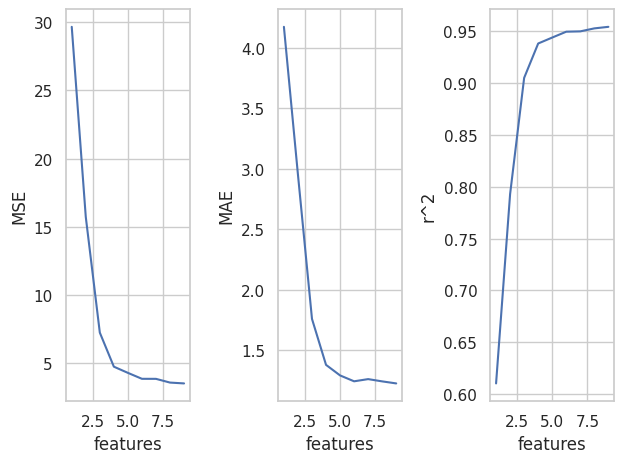

In [40]:
# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []
  kf = KFold(n_splits=10, shuffle = True)
  for train_index, test_index in kf.split(x_life):
    # Training phase
    x_train = x_life[train_index, :]
    y_train = y_life[train_index]
    regr_cv = RandomForestRegressor()
    fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = fselection_cv.transform(x_life[test_index, :])
    y_test = y_life[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)
  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

# Imprime los resultados
print("\nNúmero óptimo de características (MSE):", n_feats[np.argmin(mse_nfeat)])
print("Número óptimo de características (MAE):", n_feats[np.argmin(mae_nfeat)])
print("Número óptimo de características (R^2):", n_feats[np.argmax(r2_nfeat)],'\n')

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [41]:
df_status.columns
df_status = df_status.drop(columns=['Country','Life expectancy ','Year','Adult Mortality','Hepatitis B','Polio','GDP','Income composition of resources'], axis=1)
df_status.head()

,Status,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,Developing,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,Developing,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,Developing,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,Developing,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,Developing,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
X = df_status

X['Status'] = label_enc.fit_transform(df_status['Status'])

model = DecisionTreeRegressor()
scores = cross_val_score(model, X, y_life, cv=5, scoring='r2')
print("Scores de validación cruzada (R2):", scores)
print("Score promedio (R2):", scores.mean())

Scores de validación cruzada (R2): [0.65795021 0.58395264 0.79681264 0.59678724 0.71007126]
Score promedio (R2): 0.669114798347221


- Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?
Puede ser viable en el sentido de poder comprobar la relacion entre las variables de respuesta y predictoras pero otro modelo podria reflejar otro tipo de perspectiva al analisis de estos mismos datos.
- ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?
Definitivamente el metodo secuencial Filter-Wrapper funciona muy bien ya que es la que toma mas caracteristicas para evaluar las relaciones de los datos con mejor lujo de detalle, es decir, toma mas caracteristicas a comparacion de los otros metodos de seleccion.
- Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?
Las caracteristicas que mas llamaron la atencion fueron aquellas que reflejan una gran correlacion de los datos en conjunto con la esperanza de vida que reflejan la salud publica como por ejemplo infant deaths, percentage expenditure, under-five deaths.
- ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué? Ambos modelos funcionaron bien, el modelo lineal logra reflejar la relacion entre las diferenetes caracteristicas mientras que el modelo no lineal logra reflejar la variabilidad entre las diferentes caracteristicas, ambos en comparacion con la variable de respuesta. Aun asi, para este caso el modelo no lineal funciona mejor para reflejar informacion mas relevante dentro del estudio.
- ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?
No diria que es una mejora, pero definitivamente se ve un resultado muy interesante al momento de cambiar la variable categorica ya que se puede ver como Status se ve directamente relacionada con el pais y la expectativa de vida alta.
- ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.
La variable Status refleja como dependiendo de donve venga de pais de origen el dato y el estatus social y economico del mismo, la expectativa de vida aumenta considerablemente a comparacion de datos que provengan de paises donde el estatus social y economico no esten a la altura de paises mas desarrollados, reflejando una relacion mas grande con las demas categorias y bajando la expectativa de vida.